In [3]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Problem 1

Text(0, 0.5, 'a(x)')

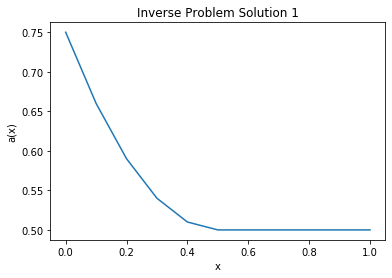

In [28]:
# Hyperparameters/functions
u = lambda x : x**2 + x/2 + 5/16
u_der = lambda x : 2*x + 0.5
def f(x):
    if x <= 0.5:
        return -6*x**2 + 3*x - 1
    elif 0.5 < x and x <= 1:
        return -1
    else:
        raise TypeError
N = 10
h = 1/N
x = np.array([j*h for j in range(N+1)])
c0 = 3/8
c1 = 5/4

# Define a function dependant on aplhas to minimize
function = lambda alpha : np.sum([((c0-quad(f, 0, x[j])[0]) / alpha[j] - u_der(x[j]))**2 for j in range(11)])

# Use scipy minimize function to find the optimal values of alpha
alphas = minimize(function, np.ones(11)).x

# Plot the values of alpha found since alpha[j] ~ a(x[j])
domain = np.linspace(0, 1, N)
plt.plot(x, alphas)
plt.title("Inverse Problem Solution 1")
plt.xlabel("x")
plt.ylabel("a(x)")

# Problem 2

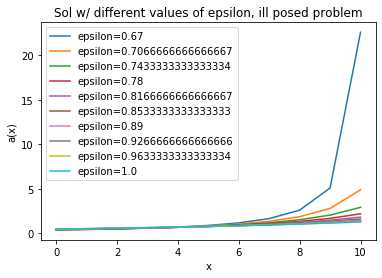

In [31]:
# Hyperparameters / functions
epsilons = np.linspace(0.67, 1, 10)
c0, c1 = 1, 2
N = 10
h = 1/N
x = np.array([j*h for j in range(N+1)])
f = lambda x : -1

# For different values of epsilon greater than 0.66, approximate the solution
for epsilon in epsilons:
    # u function is dependant on epsilon, compute derivative by hand
    u = lambda x : x + 1 + epsilon * np.sin(epsilon**(-2) * x)
    u_der = lambda x : 1 + (1/epsilon) * np.cos(epsilon**(-2)*x)
    
    # Define a function dependant on aplhas to minimize
    function = lambda alpha : np.sum([((c0-quad(f, 0, x[j])[0]) / alpha[j] - u_der(x[j]))**2 for j in range(11)])
    
    # Use scipy minimize function to find the optimal values of alpha
    alphas = minimize(function, np.ones(11)).x
    
    # Plot the values of alpha found since alpha[j] ~ a(x[j])
    plt.plot(alphas, label="epsilon={}".format(epsilon))
    plt.title("Sol w/ different values of epsilon, ill posed problem")
    plt.xlabel("x")
    plt.ylabel("a(x)")
    plt.legend()
plt.show()